In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Starbucks Capstone Challenge

## Project Overview

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Data was properly prepared in the `data_wrangling.ipynb` file, as long as descriptions for the columns involved.

## Problem statement

The goal for this project is to predict how likely will a customer respond to an offer, based on demographics and behavioural data. 

The model uses...

## Packages used

The following packages are used:
<ol>
    <li> <strong>pandas</strong>: python package for data analysis
    <li> <strong>numpy</strong>: 
    <li> <strong>matplotlib</strong>: 
    <li> <strong>seaborn</strong>: 
    <li> <strong>scitkit-learn</strong>: 
    <li> <strong>scipy.stats</strong>: 
    <li> <strong></strong>: 
</ol>

## Metrics

The following metrics are going to be used to measure the models performance:

## Loading data

Data was cleaned in `data_modeling.ipynb`.

In [81]:
events = pd.read_csv('data\\transcript_clean.csv')
customers = pd.read_csv('data\profile_clean.csv')
portfolio = pd.read_csv('data\portfolio_clean.csv')

In [82]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      306534 non-null  object 
 1   time             306534 non-null  int64  
 2   amount           138953 non-null  float64
 3   offer_id         167581 non-null  object 
 4   reward           33579 non-null   float64
 5   offer_completed  306534 non-null  int64  
 6   offer_received   306534 non-null  int64  
 7   offer_viewed     306534 non-null  int64  
 8   transaction      306534 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 21.0+ MB


In [83]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              14825 non-null  object 
 1   became_member_on         14825 non-null  object 
 2   income                   14825 non-null  float64
 3   gender_F                 14825 non-null  int64  
 4   gender_M                 14825 non-null  int64  
 5   gender_O                 14825 non-null  int64  
 6   age_range_age_0_to_18    14825 non-null  int64  
 7   age_range_age_18_to_25   14825 non-null  int64  
 8   age_range_age_25_to_30   14825 non-null  int64  
 9   age_range_age_30_to_35   14825 non-null  int64  
 10  age_range_age_35_to_40   14825 non-null  int64  
 11  age_range_age_40_to_45   14825 non-null  int64  
 12  age_range_age_45_to_50   14825 non-null  int64  
 13  age_range_age_50_to_55   14825 non-null  int64  
 14  age_range_age_55_to_60

In [84]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   reward                    10 non-null     int64 
 1   difficulty                10 non-null     int64 
 2   duration                  10 non-null     int64 
 3   offer_id                  10 non-null     object
 4   channel_0_email           10 non-null     int64 
 5   channel_0_web             10 non-null     int64 
 6   channel_1_email           10 non-null     int64 
 7   channel_1_mobile          10 non-null     int64 
 8   channel_2_mobile          10 non-null     int64 
 9   channel_2_social          10 non-null     int64 
 10  channel_3_social          10 non-null     int64 
 11  offer_type_bogo           10 non-null     int64 
 12  offer_type_discount       10 non-null     int64 
 13  offer_type_informational  10 non-null     int64 
dtypes: int64(13), object(1)
memor

In [85]:
df_merge = pd.merge(customers, 
                    events,
                    how='outer',
                    on='customer_id')
df_merge.head()

,customer_id,became_member_on,income,gender_F,gender_M,gender_O,age_range_age_0_to_18,age_range_age_18_to_25,age_range_age_25_to_30,age_range_age_30_to_35,...,age_range_age_60_to_65,age_range_age_65_to_101,time,amount,offer_id,reward,offer_completed,offer_received,offer_viewed,transaction
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18,21.51,NaN,NaN,0,0,0,1
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,144,32.28,NaN,NaN,0,0,0,1
2,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,408,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
3,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,504,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0,1,0,0
4,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,528,23.22,NaN,NaN,0,0,0,1


In [86]:
df = pd.merge(df_merge,
            portfolio,
            how='outer',
            on='offer_id')
df['offer_id'].unique().shape

(11,)

That means 10 types of offer plus the portfolio.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               306534 non-null  object 
 1   became_member_on          272762 non-null  object 
 2   income                    272762 non-null  float64
 3   gender_F                  272762 non-null  float64
 4   gender_M                  272762 non-null  float64
 5   gender_O                  272762 non-null  float64
 6   age_range_age_0_to_18     272762 non-null  float64
 7   age_range_age_18_to_25    272762 non-null  float64
 8   age_range_age_25_to_30    272762 non-null  float64
 9   age_range_age_30_to_35    272762 non-null  float64
 10  age_range_age_35_to_40    272762 non-null  float64
 11  age_range_age_40_to_45    272762 non-null  float64
 12  age_range_age_45_to_50    272762 non-null  float64
 13  age_range_age_50_to_55    272762 non-null  f

## Who are the buying customers?
At this section, I'm going to analyse the data to better understand customers who buy stuff behavior and demographics.

[41.342327150084316, 57.227655986509276, 1.430016863406408]
[36.36424957841484, 43.27824620573356, 1.2074198988195615]


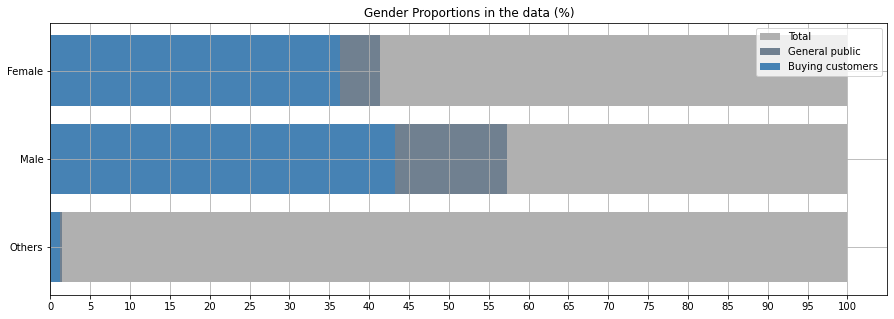

In [103]:
unique_customs = df.groupby('customer_id').first()
unique_buying_customs = df[df['offer_completed']>0].groupby('customer_id').first()
unique_customs_f = unique_customs.gender_F.dropna()
unique_customs_m = unique_customs.gender_M.dropna()
unique_customs_o = unique_customs.gender_O.dropna()
buying_customs_f = unique_buying_customs.gender_F.dropna()
buying_customs_m = unique_buying_customs.gender_M.dropna()
buying_customs_o = unique_buying_customs.gender_O.dropna()
total = unique_customs_f.shape[0]

gender_proportions = [unique_customs_f.sum()/total*100,
                      unique_customs_m.sum()/total*100,
                      unique_customs_o.sum()/total*100]
gender_proportions_buying = [buying_customs_f.sum()/total*100,
                            buying_customs_m.sum()/total*100,
                            buying_customs_o.sum()/total*100]                     

column_names = ['Female', 'Male', 'Others']
a_hundred = [100, 100, 100] #to plot the background


fig, ax = plt.subplots(figsize=(15,5))
ax.barh(column_names, a_hundred, color = '#B0B0B0')
ax.barh(column_names, gender_proportions, color = 'slategrey')
ax.barh(column_names, gender_proportions_buying, color = 'steelblue')
ax.invert_yaxis()
ax.set_xticks(range(0,101,5))
ax.grid()
ax.legend(['Total','General public', 'Buying customers'])
ax.set_title('Gender Proportions in the data (%)')
print(gender_proportions)
print(gender_proportions_buying)

Even the male customers being the most present in the dataset, we can clearly see that women are more likely to be the ones buying. 

# erase later
Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).